In [26]:
# Importing necessary libraries
import joblib
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/Users/ravindher.madishetty/Desktop/Logistic_Regression/Turbine_Failure/data/turbine_data.csv')

# Prepare data
X = df.drop(['failure', 'timestamp'], axis=1)  # Features
y = df['failure']  # Target
print(df.shape)
print(X.shape)
print(y.shape)


(35425, 7)
(35425, 5)
(35425,)


In [27]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Standardize the features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)

(28340, 5)
(7085, 5)
(28340,)


In [28]:
# Build the model
#model = LogisticRegression()
#model.fit(X_train, y_train)

# Step 3: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
print(y_train.value_counts())
print(y_train_smote.value_counts())


failure
0    28296
1       44
Name: count, dtype: int64
failure
0    28296
1    28296
Name: count, dtype: int64


In [29]:
# Step 4: Create and train the Random Forest Classifier with class weight 'balanced'
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)

# After model training, save the model and scaler
joblib.dump(model, 'turbine_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print('Model and scaler saved!')

# Evaluate the model
y_pred = model.predict(X_test)

#print(classification_report(y_test, y_pred))

Model and scaler saved!


c:\Users\ravindher.madishetty\Desktop\Logistic_Regression\Turbine_Failure\turbine\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [30]:
# Evaluate the model - Confusion Matrix and Accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix:
[[7070    0]
 [  15    0]]
Accuracy: 0.9979


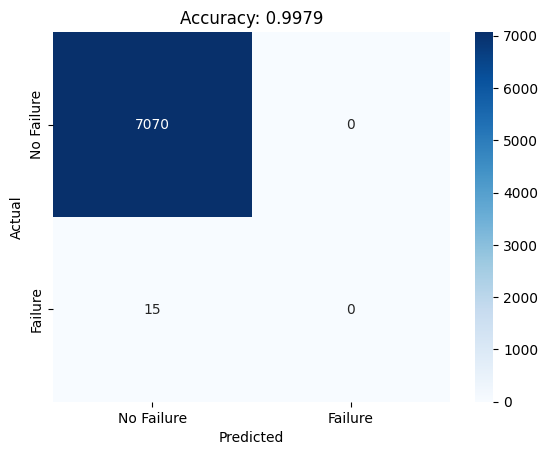

In [31]:
# Visualize Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.title(f"Accuracy: {accuracy:.4f}")
plt.show()